<a href="https://colab.research.google.com/github/Taeseong-eom/Gangseo-Competition/blob/main/Preprocessing/%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/강서구데이터공모전/강서구_유동인구_2018.csv')

<ipython-input-13-83ea3082d843>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample('10D').mean()
<ipython-input-13-83ea3082d843>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  resampled_df_2019 = resampled_df['2019']


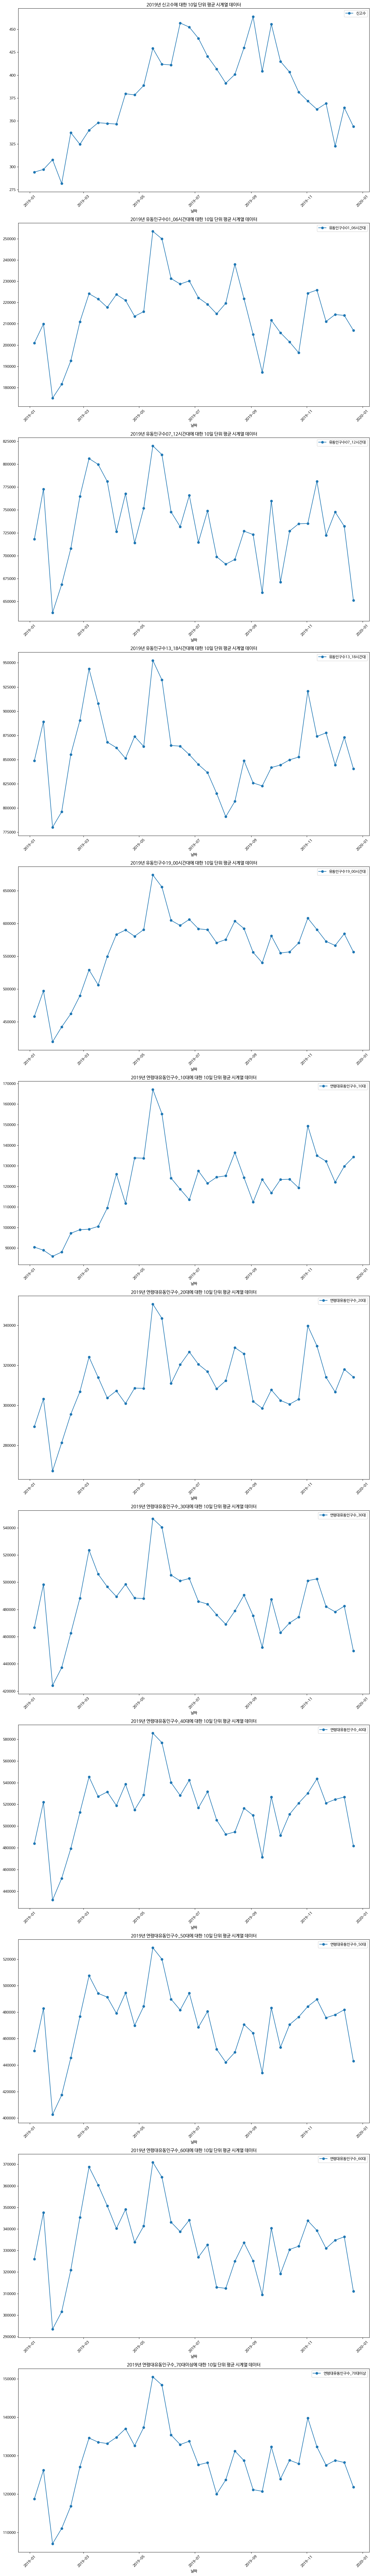

In [ ]:
# '년월일' 컬럼을 datetime 타입으로 변환
df['년월일'] = pd.to_datetime(df['년월일'], format='%Y%m%d')

# '년월일'을 인덱스로 설정
df.set_index('년월일', inplace=True)

# 각 컬럼에 대해 10일 단위로 데이터 그룹화하고 평균값 계산
resampled_df = df.resample('10D').mean()

# 2019년 데이터만 필터링
resampled_df_2019 = resampled_df['2019']

# 컬럼 개수에 따라 subplot 생성
n_cols = len(df.columns) - 1  # 첫 번째 컬럼('년월일')은 이미 인덱스로 설정했으므로 제외
fig, axes = plt.subplots(n_cols, 1, figsize=(14, 8 * n_cols))  # 각 컬럼별로 별도의 그래프를 생성

for i, column in enumerate(df.columns[1:]):  # 첫 번째 컬럼('년월일')은 이미 인덱스로 설정했으므로 제외
    axes[i].plot(resampled_df_2019.index, resampled_df_2019[column], marker='o', label=column)
    axes[i].set_title(f'2019년 {column}에 대한 10일 단위 평균 시계열 데이터')  # 각 그래프의 제목 설정
    axes[i].set_xlabel('날짜')  # x축 라벨 설정
    axes[i].legend()  # 범례 표시
    axes[i].tick_params(axis='x', rotation=45)  # x축 라벨 회전

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# 각 컬럼별로 그래프를 그리고 저장하는 수정된 코드

for i, column in enumerate(df.columns[1:]):
    fig, ax = plt.subplots(figsize=(14, 8))  # 각 컬럼별로 별도의 그래프 생성
    ax.plot(resampled_df_2019.index, resampled_df_2019[column], marker='o', label=column)
    ax.set_title(f'2019년 {column}에 대한 10일 단위 평균 시계열 데이터')
    ax.set_xlabel('날짜')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    # 각 그래프를 별도의 파일로 저장
    plt.tight_layout()
    plt.savefig(f'2019_{column}_data_graph.png', dpi=300)
    plt.close()  # 현재 그래프를 닫아 다음 그래프를 준비
